# Drivers dataset analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

## Data import

In [2]:
drivers = pd.read_csv('drivers.csv')

## Data preprocessing

In [3]:
drivers.rename(columns={
     ' Vehicle_Location-Restricted_Lane' : 'Vehicle_Location-Restricted_Lane',
     ' Hit_Object_off_Carriageway' : 'Hit_Object_off_Carriageway',
     ' Age_of_Driver' : 'Age_of_Driver',
     ' Propulsion_Code' : 'Propulsion_Code',
     ' Location_Northing_OSGR' : 'Location_Northing_OSGR',
     ' Police_Force' : 'Police_Force',
     ' Local_Authority_(District)' : 'Local_Authority_(District)',
     ' 2nd_Road_Number' : '2nd_Road_Number',
     ' Vehicle_Reference_df' : 'Vehicle_Reference_df',
     ' Sex_of_Casualty ' : 'Sex_of_Casualty',
     ' Pedestrian_Location' : 'Pedestrian_Location',
     ' Casualty_IMD_Decile' : 'Casualty_IMD_Decile',
     ' Vehicle_Type' : 'Vehicle_Type',
     ' Hit_Object_in_Carriageway' : 'Hit_Object_in_Carriageway',
     ' Was_Vehicle_Left_Hand_Drive?' : 'Was_Vehicle_Left_Hand_Drive',
     ' Age_Band_of_Driver' : 'Age_Band_of_Driver',
     ' Age_of_Vehicle' : 'Age_of_Vehicle',
     ' Longitude' : 'Longitude',
     ' Number_of_Vehicles' : 'Number_of_Vehicles',
     ' 1st_Road_Number' : '1st_Road_Number',
     ' Urban_or_Rural_Area ' : 'Urban_or_Rural_Area',
     ' Casualty_Reference' : 'Casualty_Reference',
     ' Age_of_Casualty' : 'Age_of_Casualty',
     ' Pedestrian_Movement' : 'Pedestrian_Movement',
     ' Sex_of_Driver' : 'Sex_of_Driver',
     ' Vehicle_Manoeuvre' : 'Vehicle_Manoeuvre',
     ' Engine_Capacity_(CC)' : 'Engine_Capacity_(CC)',
     ' Location_Easting_OSGR' : 'Location_Easting_OSGR',
     ' Latitude' : 'Latitude',
     ' Number_of_Casualties' : 'Number_of_Casualties',
     ' Age_Band_of_Casualty' : 'Age_Band_of_Casualty',
     ' Casualty_Type' : 'Casualty_Type'}, inplace=True)

In [4]:
#drivers.columns.values
#drivers[' Sex_of_Driver'].value_counts()
#drivers.isnull().sum()

#### splitting data to train and test

In [5]:
y = drivers['Sex_of_Driver'].values
X = drivers.drop('Sex_of_Driver', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Logistic Regression

### Training model

#### note: runs  ~2mins

In [6]:
logreg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [7]:
# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

In [8]:
logreg.score(X_test,y_test)

0.6961734617793552

### Model evaluation

In [9]:
# Compute and print the confusion matrix and classification report
print(f'confusion matrix: {confusion_matrix(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

confusion matrix: [[12006  4844]
 [ 5343 11336]]
              precision    recall  f1-score   support

         1.0       0.69      0.71      0.70     16850
         2.0       0.70      0.68      0.69     16679

    accuracy                           0.70     33529
   macro avg       0.70      0.70      0.70     33529
weighted avg       0.70      0.70      0.70     33529



In [10]:
confusion_matrix(y_test, y_pred)

array([[12006,  4844],
       [ 5343, 11336]])

#### ROC and AUC

In [11]:
y_test_proba = logreg.predict_proba(X_test)[:, 1]

In [12]:
fpr, tpr, thresholds = roc_curve(y_test-1, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

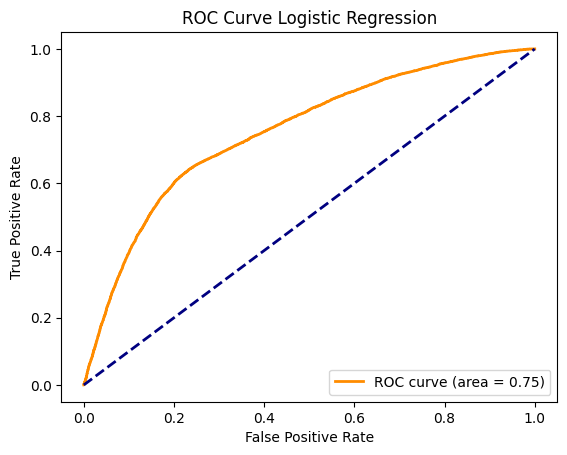

In [13]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [14]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.753765784832577


In [15]:
# tohle bezi strasne dlouho.... asi to vyhodime
# cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
# print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

### RandomForest

In [16]:
randomForest = RandomForestClassifier(max_depth=30, random_state=42)
randomForest.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, random_state=42)

In [17]:
randomForest.score(X_test,y_test)

0.7885114378597632

In [18]:
randomForest_y_pred = randomForest.predict(X_test)

## Model evaluation

In [19]:
# Compute and print the confusion matrix and classification report
print(f'confusion matrix: {confusion_matrix(y_test, randomForest_y_pred)}')
print(classification_report(y_test, randomForest_y_pred))

confusion matrix: [[12738  4112]
 [ 2979 13700]]
              precision    recall  f1-score   support

         1.0       0.81      0.76      0.78     16850
         2.0       0.77      0.82      0.79     16679

    accuracy                           0.79     33529
   macro avg       0.79      0.79      0.79     33529
weighted avg       0.79      0.79      0.79     33529



In [20]:
y_test_proba = randomForest.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test-1, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

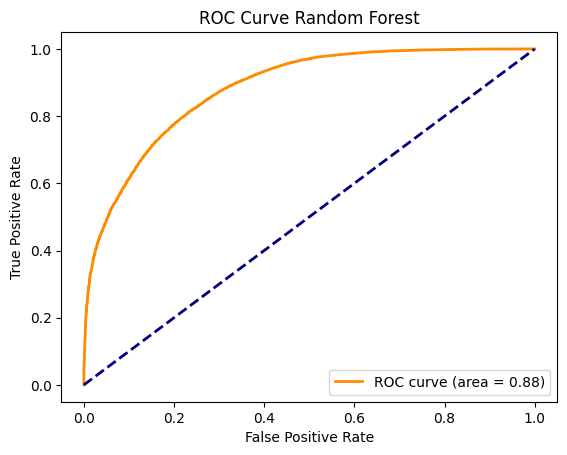

In [21]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest')
plt.legend(loc="lower right")
plt.show()

In [22]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = randomForest.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8817311059252354


In [ ]:
# nechapu nasledujici vysledky????

#### runs ~2min

In [24]:
cv_auc = cross_val_score(randomForest, X, y, cv=5, scoring='roc_auc')
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.20233412 0.23890382 0.27498254 0.29599916 0.16349599]
